In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("train.csv")
df.head()


,x1,x2,class
0,0.30,0.69,0
1,-0.77,0.55,0
2,-0.14,0.89,0
3,-0.85,0.92,0
4,-0.26,0.69,0


In [38]:
df.isnull().sum()


x1       0
x2       0
class    0
dtype: int64

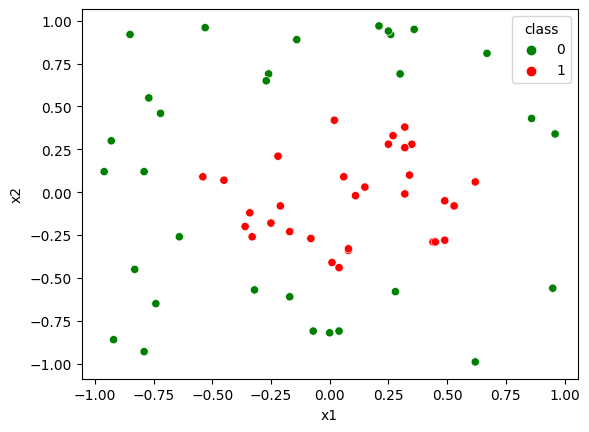

In [39]:
sn.scatterplot(x="x1", y="x2",hue="class",data=df,palette=['green','red']);


<AxesSubplot: xlabel='class', ylabel='count'>

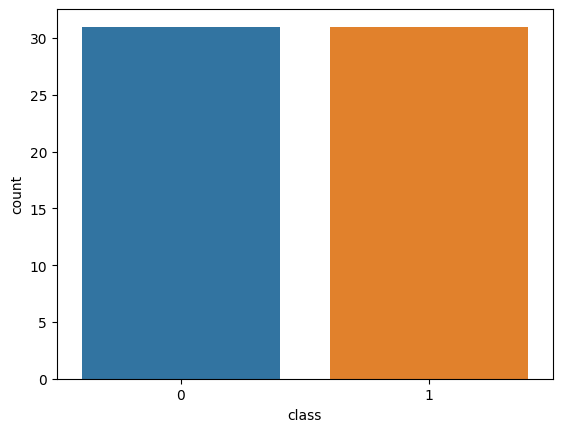

In [16]:
import seaborn as sns  #To perform visualization

sns.countplot(x='class', data=df)


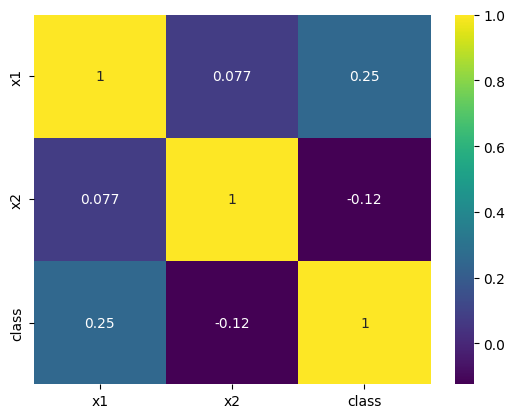

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()
#Seems like the features are highly correlated with the target variable.


In [40]:
def cost_function(X, y, weights):
    scores = np.dot(X, weights)
    h = sigmoid(scores)
    return (-1/len(df)) * sum( (y*np.log(h)) + (1-y)*(np.log(1-h)) )

In [41]:
# Defining Sigmoid Function
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [42]:
def gradient_descent(X, y, learning_rate, nbr_steps):
intercept = np.ones((X.shape[0], 1))
X = np.hstack((intercept, X))
weights = np.zeros(X.shape[1])
m = len(df)
for step in range(nbr_steps):
    scores = np.dot(X, weights)
    hypothesis = sigmoid(scores)
    output_error_signal = hypothesis - y

    gradient = np.dot(X.T, output_error_signal)

    weights -= (learning_rate/m) * gradient

return weights


IndentationError: expected an indented block after function definition on line 1 (3534100118.py, line 2)

In [31]:
weights = gradient_descent(df[['x1', 'x2']], df['class'], 0.001, 350000)
weights

NameError: name 'gradient_descent' is not defined

In [32]:
# COMPUTE THE COEFFICIENTS USING SCIKIT-LEARN LIBRARY
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(df[['x1','x2']], df['class'])
sklearn_weights = [mdl.intercept_[0], mdl.coef_[0,0], mdl.coef_[0,1]]
print(sklearn_weights)

[0.039878590603725526, 0.8711056890852187, -0.4483086385853505]


In [36]:
#DRAW THE DECISION BOUNDARY LINE
# First I define two points for my decision boundary line
x1 = (-weights[0] - weights[2]*df.iloc[0,1])/weights[1]
x2 = (-weights[0] - weights[2]*df.iloc[1,1])/weights[1]

# Second I define two points for sickit-learn decision boundary line
x11 = (-sklearn_weights[0] - sklearn_weights[2]*df.iloc[0,1])/sklearn_weights[1]
x22 = (-sklearn_weights[0] - sklearn_weights[2]*df.iloc[1,1])/sklearn_weights[1]
sn.scatterplot(x="x1", y="x2",hue="class",data=df,palette=['green','red']);

# my descision boundary line
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[1,1]))

# scikit-learn decision boundary line
plt.axline((x11, df.iloc[0,1]), (x22, df.iloc[1,1]), color = "orange")

NameError: name 'weights' is not defined

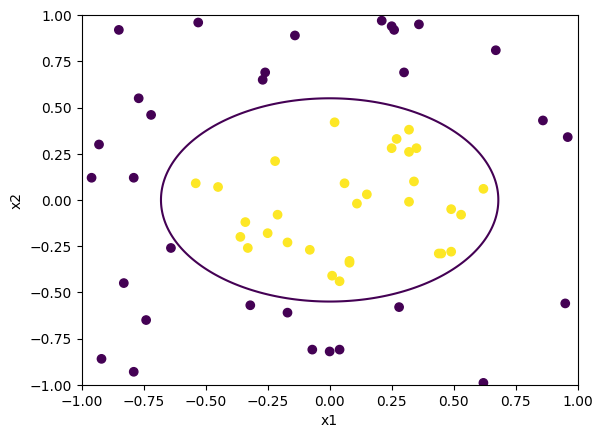

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver="liblinear",
    multi_class="auto",
    max_iter=11000,
    C=2000,
    penalty="l2",
    fit_intercept = False,
)
x = df[["x1", "x2"]].values
xx = x
y = df["class"].values
y = np.array(list( y))

x = np.c_[np.ones((len(x), 1)), np.square(x)]

x1 = np.linspace(-1, 1, 1000)
x2 = np.linspace(-1, 1, 1000)
x1, x2 = np.meshgrid(x1, x2)
model.fit(x, y)
theta = model.coef_[0]
z = theta[0] * 1 + theta[1] * x1**2 + theta[2] * x2**2


plt.scatter(xx[:, 0], xx[:, 1], c=y)

plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.contour(x1, x2, z, [0])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



